In [1]:
# Import libraries
import SimpleITK as sitk
from radiomics import featureextractor
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.cm as cm
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [2]:
# Path to features.csv
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv")

# Initiate variables
feature_names = []

# Get list of all features
for column in features:
    if column != "Case":
              feature_names.append(column)

# Process data
samples = np.zeros((np.shape(features)[0],len(feature_names)))
for rowNum, case in enumerate(features["Case"]):
    a = np.array([])
    for columnNum, feature_name in enumerate(feature_names):
        a = np.append(a, features.iloc[rowNum,columnNum+1])
    samples[rowNum-1,:] = a
samples = np.nan_to_num(samples)

# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)

# Choose subset of features for clustering
dd = d.iloc[:,1:50]

# Generate correlation matrix
corr = dd.corr()


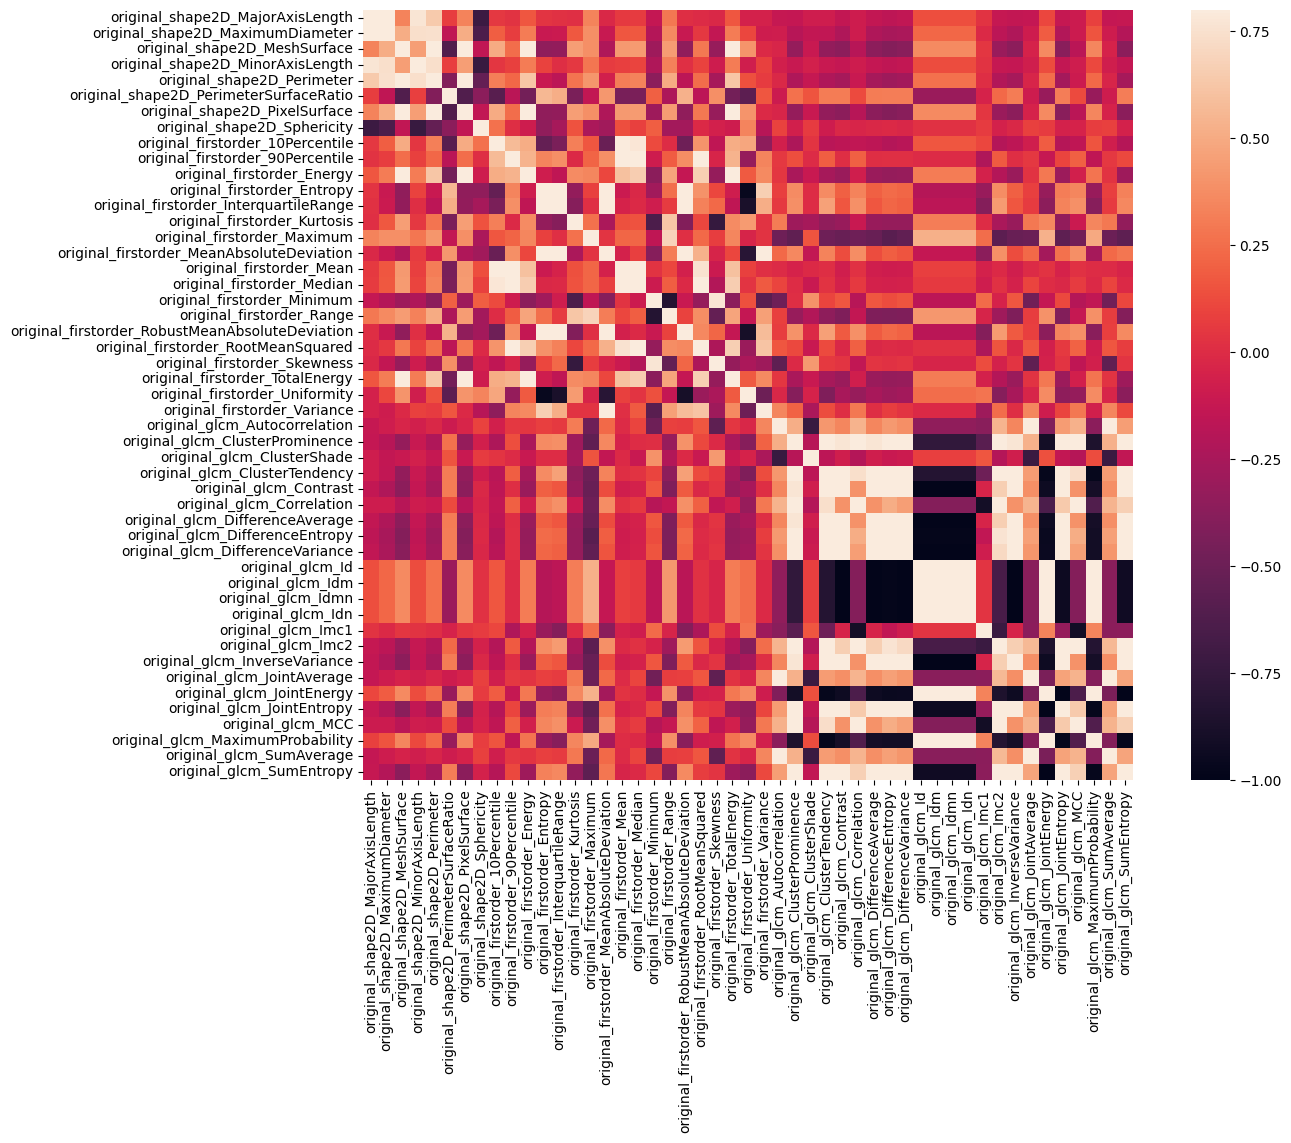

In [10]:
# Plot heat map
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, vmax=.8, square=True)
plt.show()

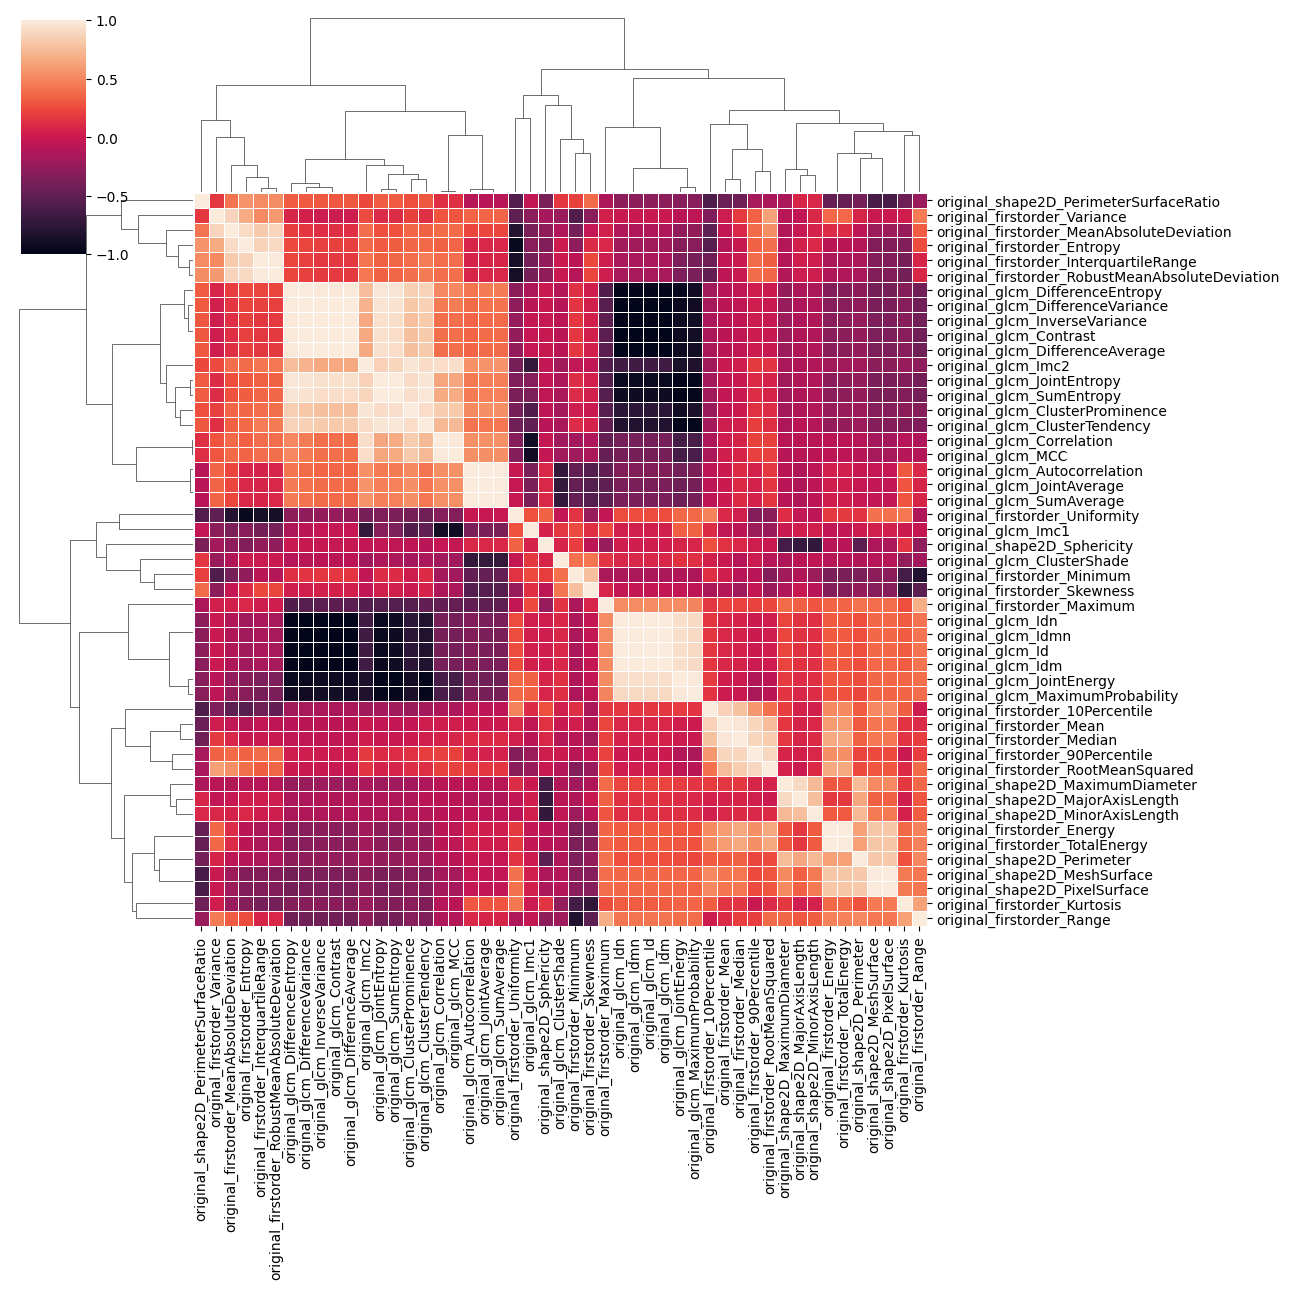

In [9]:
# Plot a clustered heat map
pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()